In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
search_terms = {
    'EEG': 'eeg|erp|erd',
    'fMRI': 'fmri|mri',
    'eye-tracking': 'eye-tracking|eye-movement', 
    'fNIRS': 'fnirs'
}

math_terms = ['Algebra', 'Geometry', 'Arithmetic', 'Numeracy', 'statistics', 'Calculus', 'Probability',
                 'Trigonometry', 'AMT', 'problem-solving', 'problem-posing' ]

psycho_terms = ['math-anxiety', 'giftedness', 'excellence', 'disabilities', 'dyscalculia']

In [128]:
# Load the data from the Excel file
num_rows_to_read = 529

covidence = pd.read_excel('Survey_8-6-24_v2_IW.xlsx', sheet_name='All - covidence', nrows=num_rows_to_read)
print(covidence.columns)

Index(['Title', 'Authors', 'Published Year', 'Published Month', 'Journal',
       'Volume', 'Issue', 'Pages', 'Accession Number', 'DOI', 'Ref',
       'Covidence #', 'Study', 'Abstract', 'reject', 'Author keywords',
       'Neuro 1', 'Neuro 2', 'Unnamed: 18', 'Unnamed: 19', 'N', 'age',
       'Unnamed: 22', 'Maths', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Psychology', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'notes'],
      dtype='object')


In [129]:
print(covidence[covidence['Published Year'].isna()])

Empty DataFrame
Columns: [Title, Authors, Published Year, Published Month, Journal, Volume, Issue, Pages, Accession Number, DOI, Ref, Covidence #, Study, Abstract, reject, Author keywords, Neuro 1, Neuro 2, Unnamed: 18, Unnamed: 19, N, age, Unnamed: 22, Maths, Unnamed: 24, Unnamed: 25, Unnamed: 26, Psychology, Unnamed: 28, Unnamed: 29, Unnamed: 30, notes]
Index: []

[0 rows x 32 columns]


In [130]:
covidence['Published Year'] = covidence['Published Year'].astype(int).astype(str)
covidence['Published Date'] = covidence['Published Year'].astype(str) + '/' + covidence['Published Month'].astype(str)
print(covidence['Published Date'])

0      2023/01/28/
1      2013/04/17/
2      2007/05/01/
3      2020/04/15/
4        2004/02//
          ...     
523      2021/03//
524      2014/06//
525    2020/01/01/
526    2013/01/02/
527    2018/04/24/
Name: Published Date, Length: 528, dtype: object


In [131]:
# Convert 'Author keywords' column to lowercase and replace 'mri' with 'fmri' for uniformity 
covidence['Author keywords'] = covidence['Author keywords'].str.lower()

for term, forms in search_terms.items():
    covidence['Author keywords'] = covidence['Author keywords'].str.replace(forms, term.lower(), regex=True)

# 1. Number of Papers Published per Year

Published Year
2019    45
2023    44
2020    44
2021    42
2018    39
2014    34
2022    34
2015    30
2016    28
2017    23
2012    23
2013    23
2010    22
2011    22
2009    18
2008     7
2006     7
2004     7
2007     7
2024     6
2005     6
2002     2
1995     2
2001     2
1996     2
2003     2
1990     2
1991     1
1987     1
1980     1
1992     1
2000     1
Name: count, dtype: int64


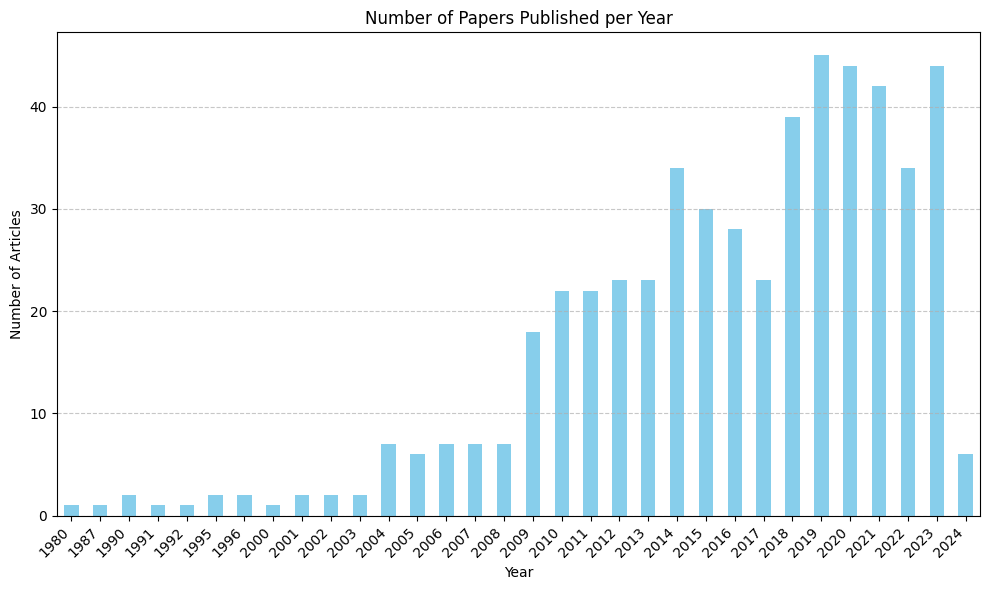

In [132]:
# Assuming 'covidence' is your DataFrame
# Assuming 'Published Year' is the column containing the publication years

# Calculate the number of articles published per year
articles_per_year = covidence['Published Year'].value_counts()

print(articles_per_year)

# Sort the series by index (year)
articles_per_year_sorted = articles_per_year.sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
articles_per_year_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Papers Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2. Number of Papers for major tools

EEG: 147
fMRI: 209
eye-tracking: 143
fNIRS: 30


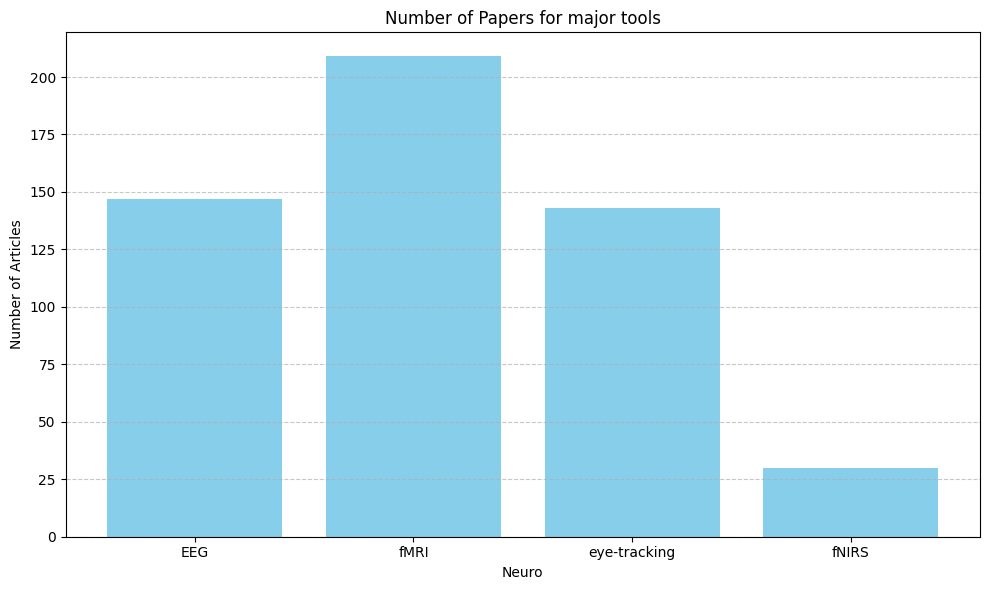

In [133]:
# Convert the 'Author keywords' column to lowercase and fill NaN values with an empty string
s = covidence['Author keywords']

# Initialize a dictionary to store counts for each search term
term_counts = {term: 0 for term in search_terms}

# Loop through each term and count its occurrences in the 'Author keywords' column
for term, forms in search_terms.items():
    count = s.str.contains(forms).sum()
    print(f"{term}: {count}")
    term_counts[term] = count
    
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(term_counts.keys(), term_counts.values(), color='skyblue')
plt.title('Number of Papers for major tools')
plt.xlabel('Neuro')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Distribution of publications from 1980 to 2024 for each methodology

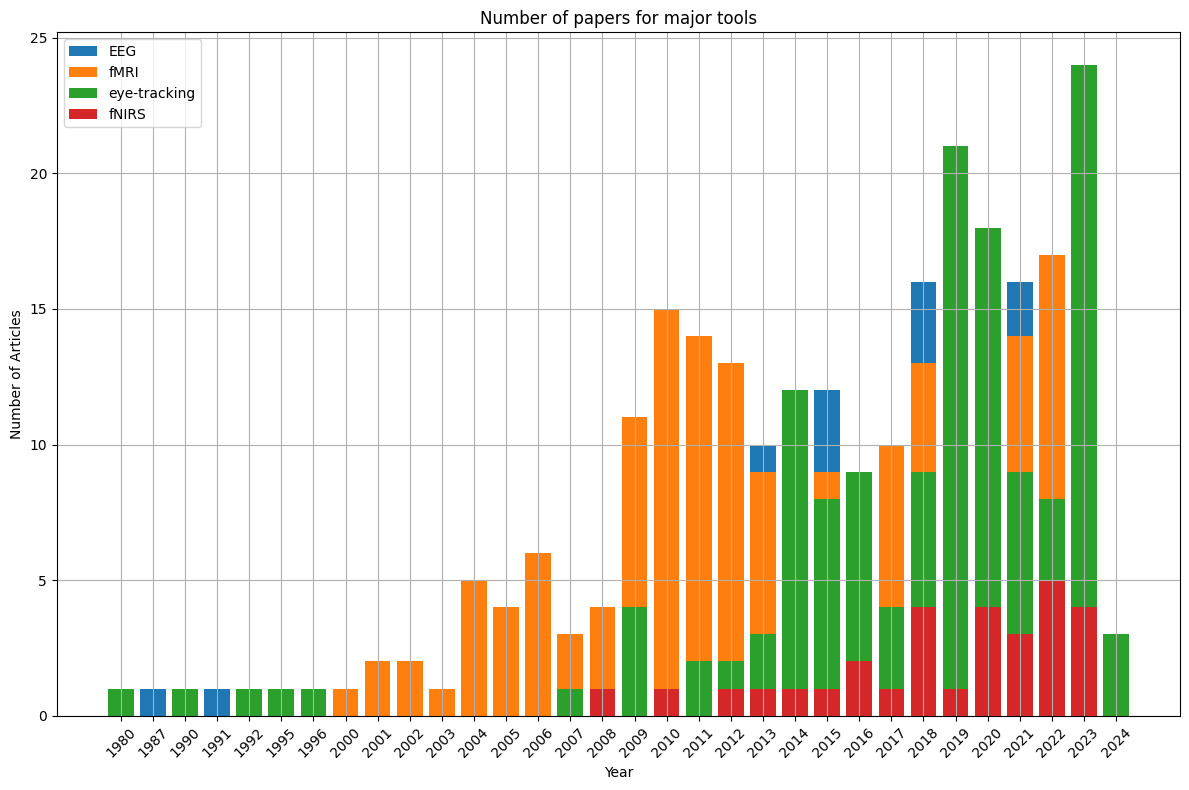


Number of Articles per Search Term and Year:
       EEG  fMRI  eye-tracking  fNIRS
1980    0     0             1      0
1987    1     0             0      0
1990    1     0             1      0
1991    1     0             0      0
1992    0     0             1      0
1995    1     0             1      0
1996    1     0             1      0
2000    0     1             0      0
2001    0     2             0      0
2002    0     2             0      0
2003    1     1             0      0
2004    2     5             0      0
2005    2     4             0      0
2006    1     6             0      0
2007    2     3             1      0
2008    1     4             1      1
2009    4    11             4      0
2010    6    15             0      1
2011    6    14             2      0
2012    5    13             2      1
2013   10     9             3      1
2014    8    12            12      1
2015   12     9             8      1
2016    7     9             9      2
2017    8    10             

In [134]:
# Convert 'Author keywords' column to lowercase and replace 'mri' with 'fmri' for uniformity
covidence['Author keywords'] = covidence['Author keywords'].str.lower().str.replace('mri', 'fmri')
covidence['Author keywords'] = covidence['Author keywords'].str.lower().str.replace('eeg|erp|erd', 'eeg', regex=True)
# Initialize an empty dictionary to store counts for each term per year
term_counts_per_year = {
    term: covidence[covidence['Author keywords'].str.contains(search_terms[term])]['Published Year'].value_counts().sort_index() 
    for term in search_terms.keys()
}

# Ensure all years are included in the plots
years = sorted(set().union(*[counts.index for counts in term_counts_per_year.values()]))

# Plot the data
plt.figure(figsize=(12, 8))
for term, counts in term_counts_per_year.items():
    counts = counts.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
    plt.bar(counts.index, counts.values, label=term)

plt.title('Number of papers for major tools')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display number of articles per search term and year in a table
article_counts = pd.DataFrame(index=years)

for term in search_terms:
    term_counts_per_year = covidence[covidence['Author keywords'].str.contains(term.lower())]['Published Year'].value_counts().sort_index()
    term_counts_per_year = term_counts_per_year.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
    article_counts[term] = term_counts_per_year

print("\nNumber of Articles per Search Term and Year:\n", article_counts)

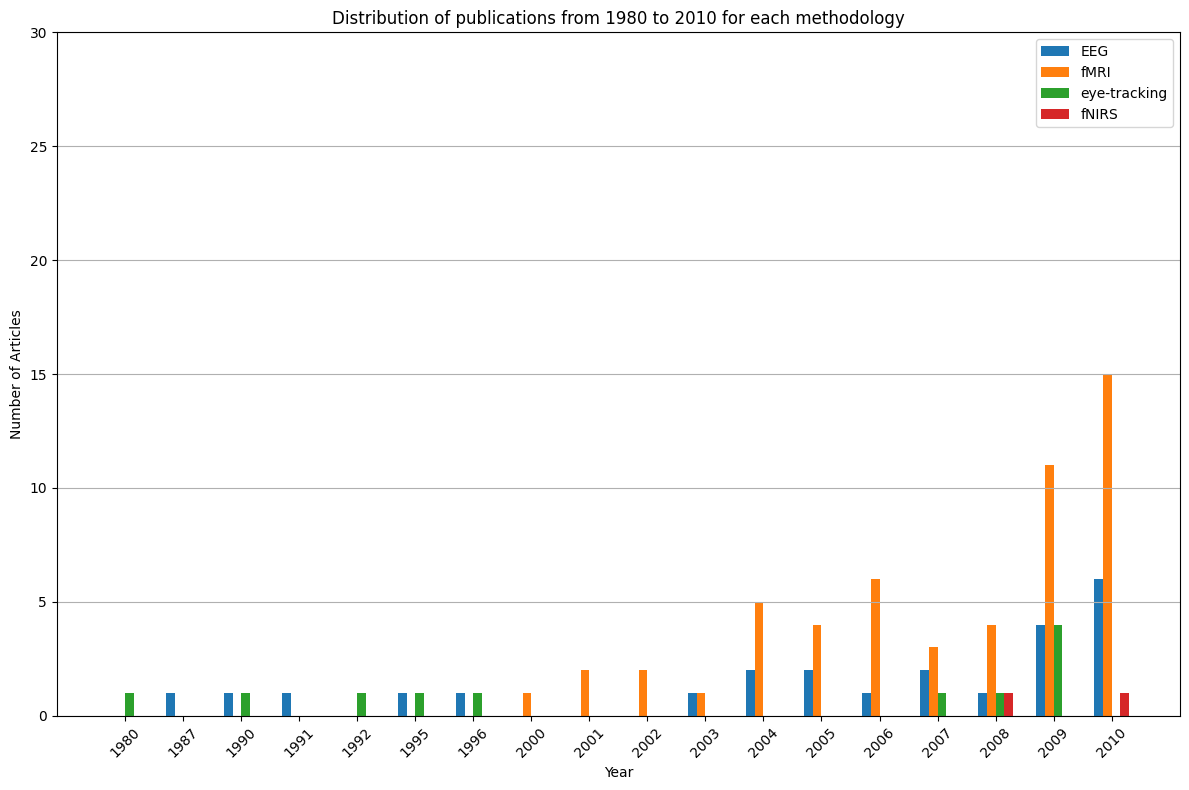


Number of Articles per Search Term and Year:
       EEG  fMRI  eye-tracking  fNIRS
1980    0     0             1      0
1987    1     0             0      0
1990    1     0             1      0
1991    1     0             0      0
1992    0     0             1      0
1995    1     0             1      0
1996    1     0             1      0
2000    0     1             0      0
2001    0     2             0      0
2002    0     2             0      0
2003    1     1             0      0
2004    2     5             0      0
2005    2     4             0      0
2006    1     6             0      0
2007    2     3             1      0
2008    1     4             1      1
2009    4    11             4      0
2010    6    15             0      1


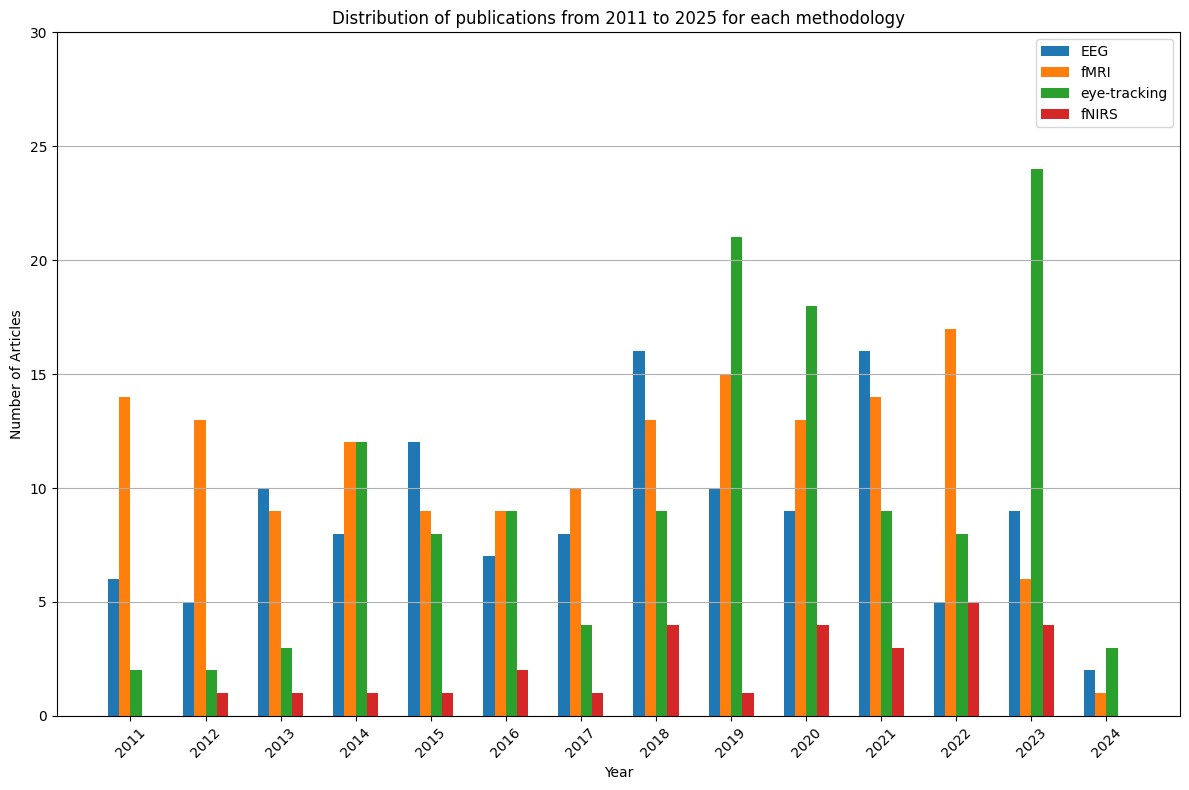


Number of Articles per Search Term and Year:
       EEG  fMRI  eye-tracking  fNIRS
2011    6    14             2      0
2012    5    13             2      1
2013   10     9             3      1
2014    8    12            12      1
2015   12     9             8      1
2016    7     9             9      2
2017    8    10             4      1
2018   16    13             9      4
2019   10    15            21      1
2020    9    13            18      4
2021   16    14             9      3
2022    5    17             8      5
2023    9     6            24      4
2024    2     1             3      0


In [135]:

# Convert 'Author keywords' column to lowercase and replace 'mri' with 'fmri' for uniformity
covidence['Author keywords'] = covidence['Author keywords'].str.lower().str.replace('mri', 'fmri')
covidence['Author keywords'] = covidence['Author keywords'].str.lower().str.replace('eeg|erp|erd', 'eeg', regex=True)

def predicate(term, range):
    year_start, year_end = range
    numeric_year = pd.to_numeric(covidence['Published Year'])
    contains_term = covidence['Author keywords'].str.contains(term.lower())
    year_range = numeric_year.between(year_start, year_end)
    return contains_term & year_range

year_ranges = [
    (1980, 2010),
    (2011, 2025)
]

for year_range in year_ranges:
    # Initialize an empty dictionary to store counts for each term per year
    term_counts_per_year = {}
    for term in search_terms:
        relevant_rows = covidence[predicate(term, year_range)]
        published_year_column = relevant_rows['Published Year']
        term_counts_per_year[term] = published_year_column.value_counts().sort_index()
    
    # Ensure all years are included in the plots
    years = sorted(set().union(*[counts.index for counts in term_counts_per_year.values()]))
    
    # Plot the data
    plt.figure(figsize=(12, 8))
    width = 0.15  # Width of each bar
    
    # Positions of the bars on the x-axis
    positions = {term: [i + idx * width for i in range(len(years))] for idx, term in enumerate(search_terms)}
    
    for term, counts in term_counts_per_year.items():
        counts = counts.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
        plt.bar(positions[term], counts.values, width=width, label=term)
    
    # Adjust x-ticks to be in the center of grouped bars
    plt.xticks([i + width*(len(search_terms)-1)/2 for i in range(len(years))], years, rotation=45)
    
    plt.title(f'Distribution of publications from {year_range[0]} to {year_range[1]} for each methodology')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.ylim(0, 30)
    plt.show()
    
    # Display number of articles per search term and year in a table
    article_counts = pd.DataFrame(index=years)
    
    for term in search_terms:
        term_counts_per_year = covidence[covidence['Author keywords'].str.contains(term.lower())]['Published Year'].value_counts().sort_index()
        term_counts_per_year = term_counts_per_year.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
        article_counts[term] = term_counts_per_year
    
    print("\nNumber of Articles per Search Term and Year:\n", article_counts)


# 6.1 # of each psychological topic

# of each Psychology term
math-anxiety: 39
giftedness: 23
excellence: 0
disabilities: 1
dyscalculia: 19


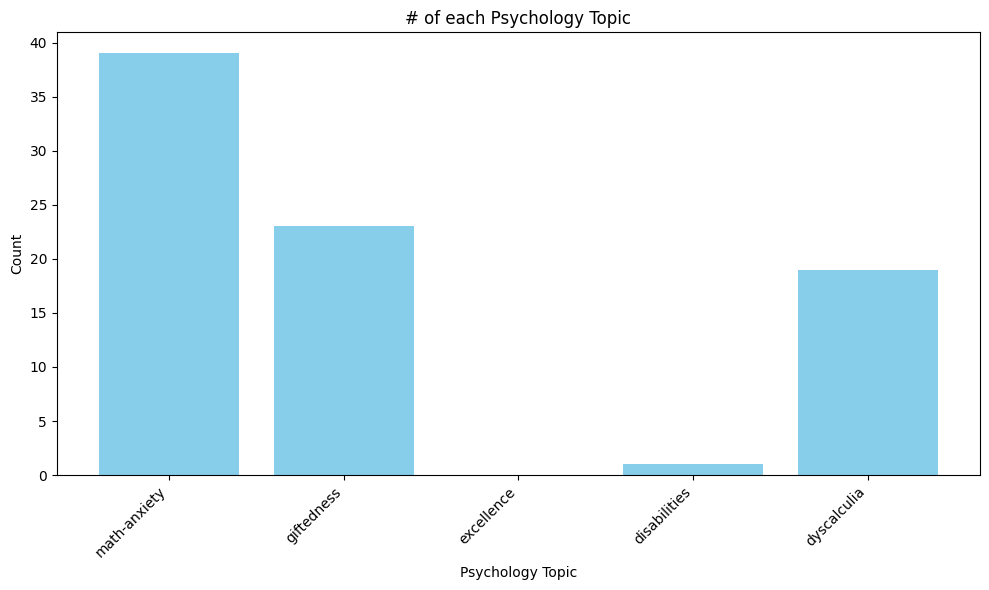

In [136]:
# Count occurrences of each search term in the 'Author keywords' column
term_counts = {}
for term in psycho_terms:
    term_counts[term] = covidence['Author keywords'].str.contains(term.lower()).sum()

print("# of each Psychology term")
for term, count in term_counts.items():
    print(f"{term}: {count}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(term_counts.keys(), term_counts.values(), color='skyblue')
plt.title('# of each Psychology Topic')
plt.xlabel('Psychology Topic')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [137]:
# 6.2 Frequency of psychological topics for each methodology

EEG {'math-anxiety': 21, 'giftedness': 14, 'excellence': 0, 'disabilities': 0, 'dyscalculia': 1}


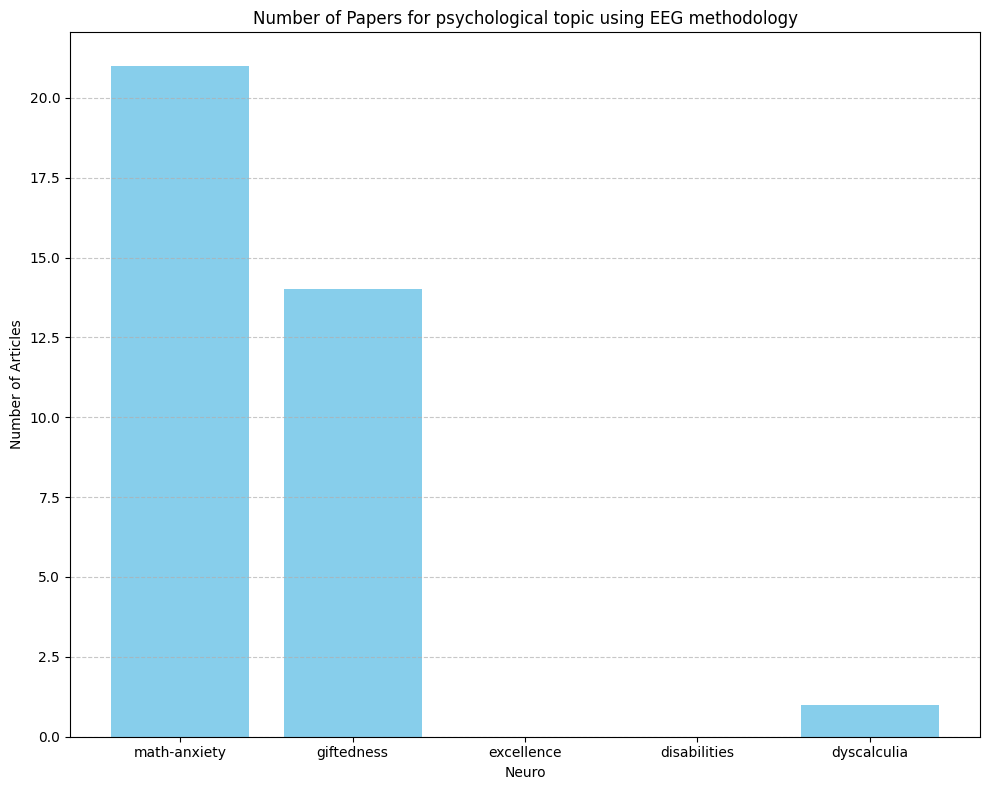

fMRI {'math-anxiety': 13, 'giftedness': 8, 'excellence': 0, 'disabilities': 1, 'dyscalculia': 15}


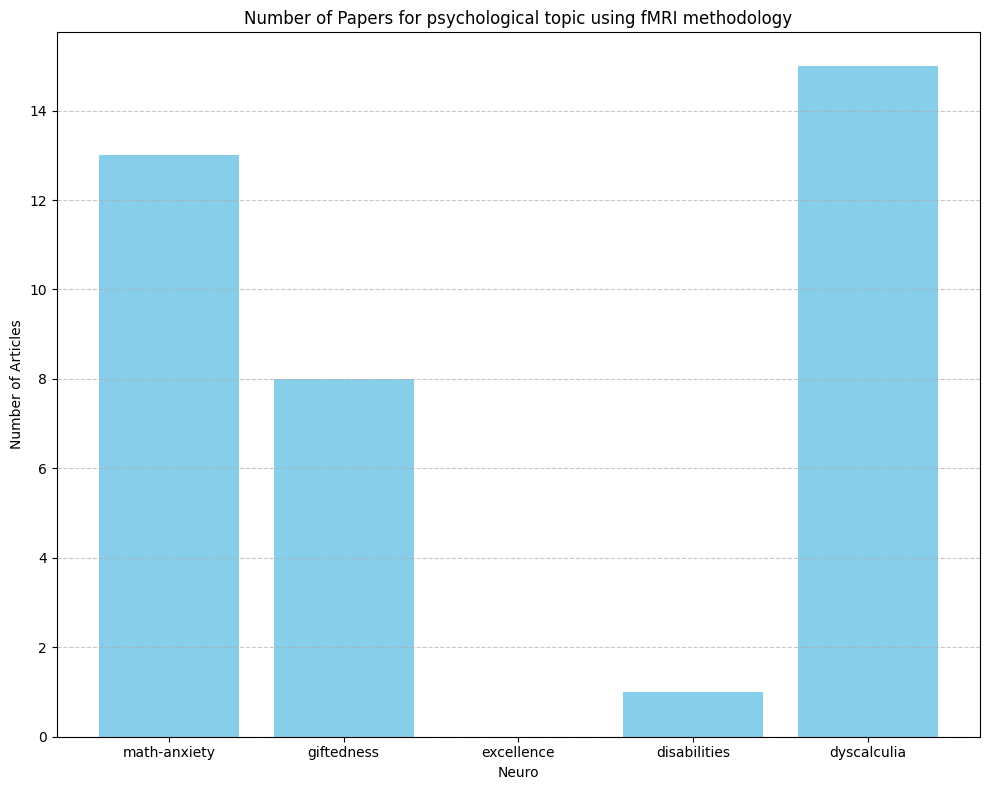

eye-tracking {'math-anxiety': 4, 'giftedness': 1, 'excellence': 0, 'disabilities': 0, 'dyscalculia': 3}


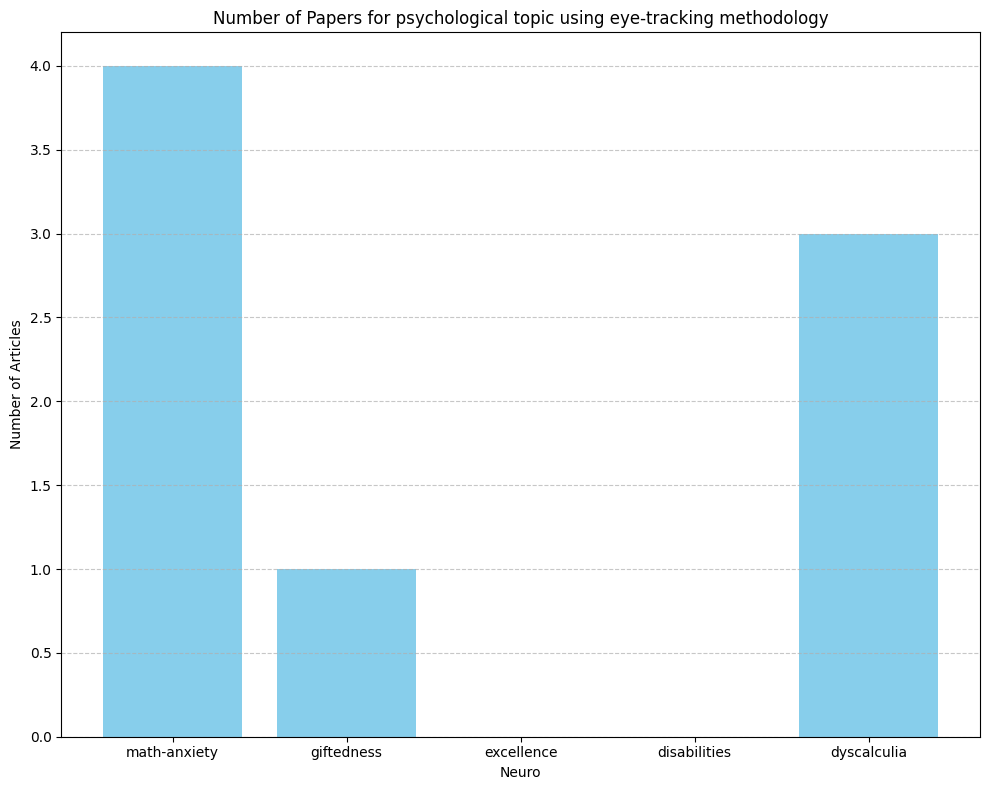

fNIRS {'math-anxiety': 0, 'giftedness': 0, 'excellence': 0, 'disabilities': 0, 'dyscalculia': 0}


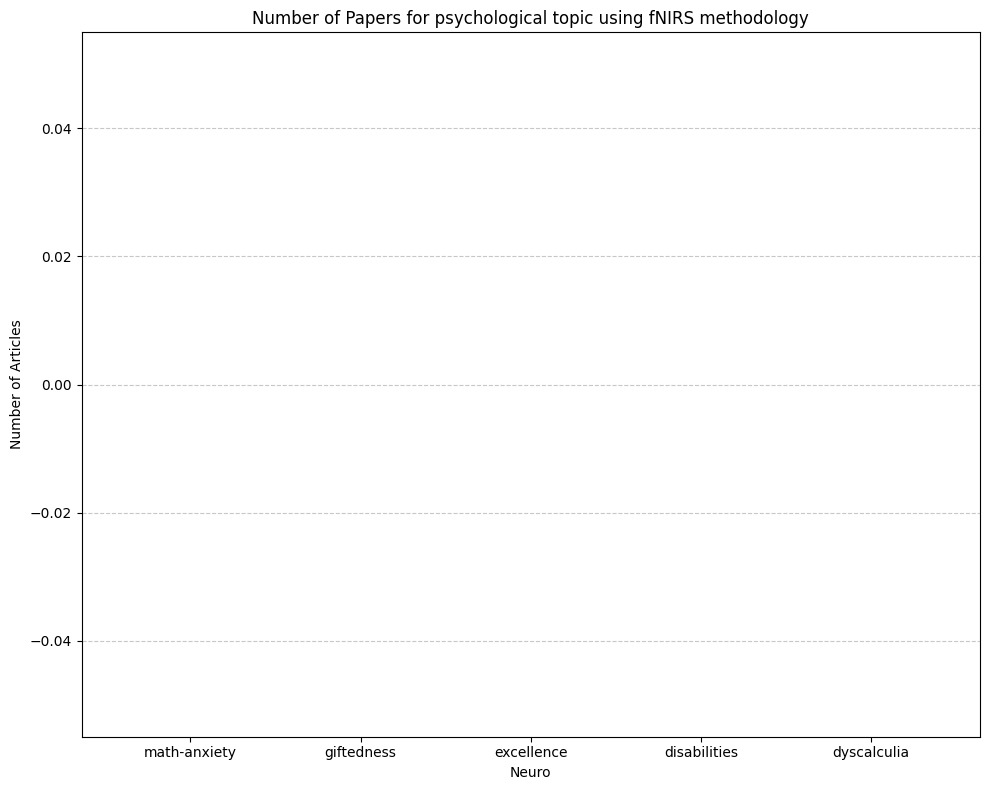

In [138]:
for search_term, forms in search_terms.items():
    relevant_rows = covidence[covidence['Author keywords'].str.lower().str.contains(forms)]
        
    psycho_terms_counts = {}
    for psycho_term in psycho_terms:
        lower_keywords = relevant_rows['Author keywords'].str.lower()
        contains_column = lower_keywords.str.contains(psycho_term.lower())  # column: True, True, False, False ...
        count_of_psycho_term = contains_column.sum()
        psycho_terms_counts[psycho_term] = count_of_psycho_term
    
    print(search_term, psycho_terms_counts)

    plt.figure(figsize=(10, 8))
    plt.bar(psycho_terms_counts.keys(), psycho_terms_counts.values(), color='skyblue')
    plt.title(f'Number of Papers for psychological topic using {search_term} methodology')
    plt.xlabel('Neuro')
    plt.ylabel('Number of Articles')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 7.1 # of each Mathematicl topic

# of each Mathematicl topic
Algebra: 54
Geometry: 48
Arithmetic: 264
Numeracy: 125
statistics: 8
Calculus: 7
Probability: 1
Trigonometry: 3
AMT: 8
problem-solving: 246
problem-posing: 4


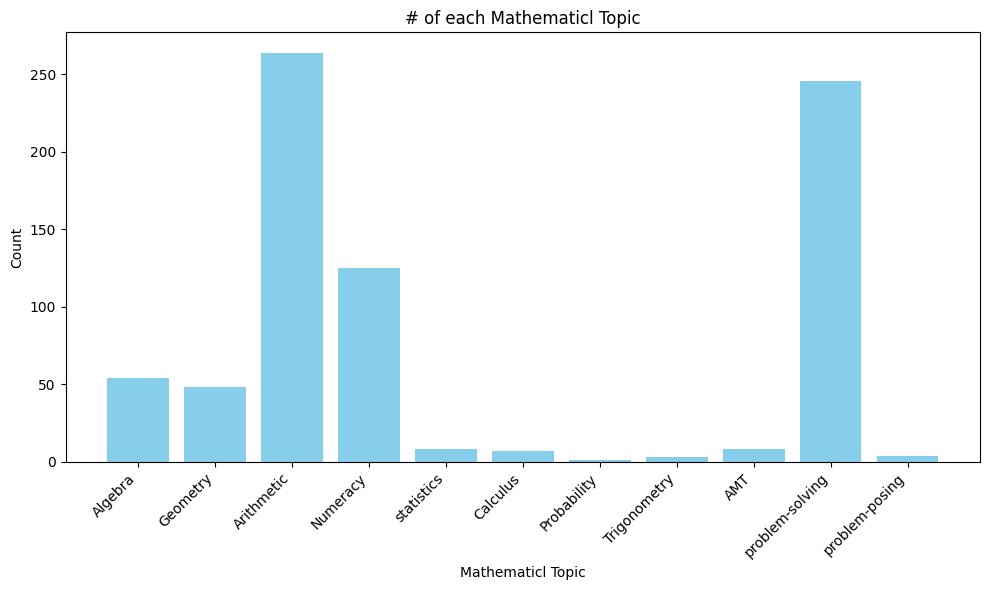

In [141]:
# Count occurrences of each search term in the 'Author keywords' column
term_counts = {}
for term in math_terms:
    term_counts[term] = covidence['Author keywords'].str.contains(term.lower()).sum()

print("# of each Mathematicl topic")
for term, count in term_counts.items():
    print(f"{term}: {count}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(term_counts.keys(), term_counts.values(), color='skyblue')
plt.title('# of each Mathematicl Topic')
plt.xlabel('Mathematicl Topic')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7.2 Frequency of Mathematicl topic for each methodology

EEG {'Algebra': 9, 'Geometry': 9, 'Arithmetic': 79, 'Numeracy': 42, 'statistics': 1, 'Calculus': 0, 'Probability': 1, 'Trigonometry': 0, 'AMT': 2, 'problem-solving': 62, 'problem-posing': 0}


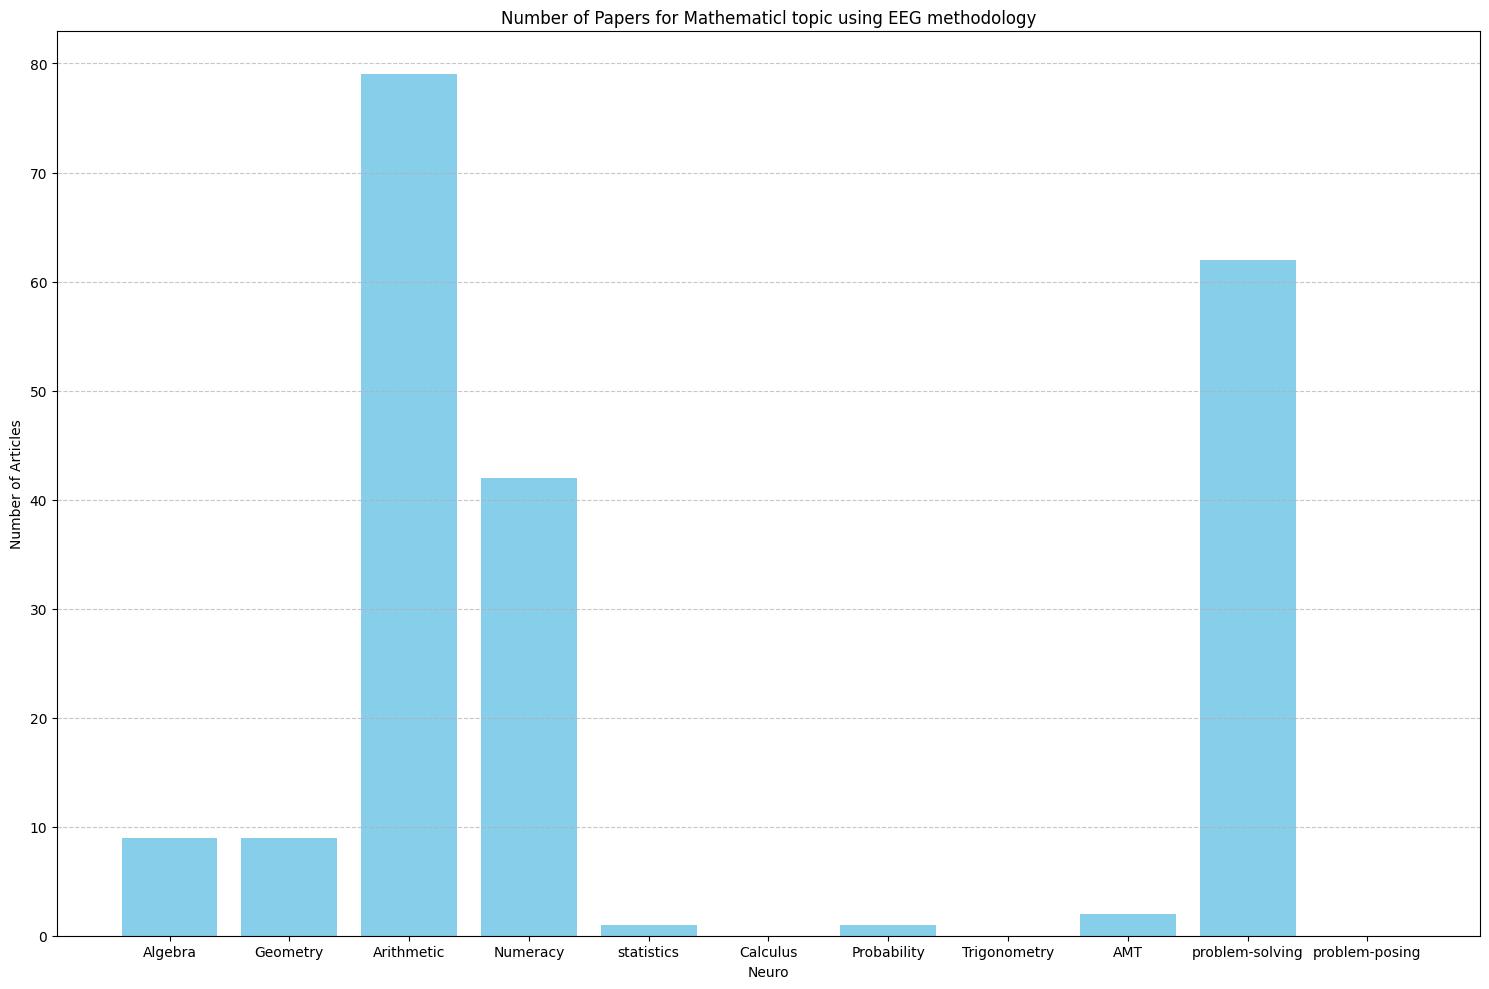

fMRI {'Algebra': 26, 'Geometry': 6, 'Arithmetic': 117, 'Numeracy': 54, 'statistics': 0, 'Calculus': 2, 'Probability': 0, 'Trigonometry': 0, 'AMT': 1, 'problem-solving': 102, 'problem-posing': 2}


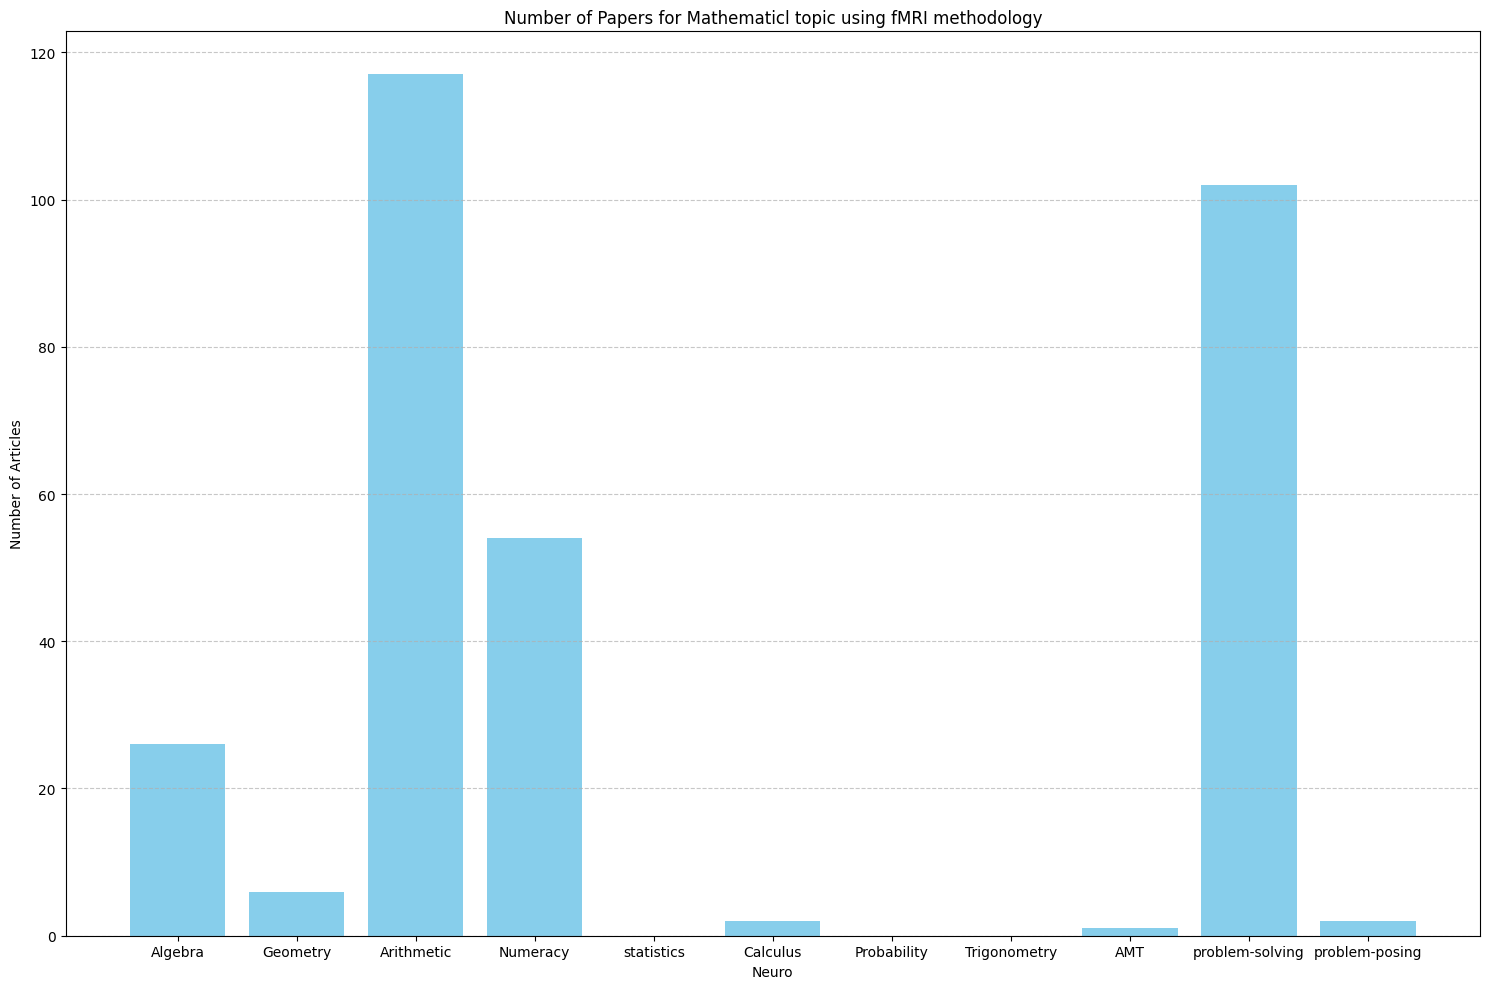

eye-tracking {'Algebra': 19, 'Geometry': 34, 'Arithmetic': 47, 'Numeracy': 21, 'statistics': 6, 'Calculus': 5, 'Probability': 0, 'Trigonometry': 3, 'AMT': 5, 'problem-solving': 70, 'problem-posing': 2}


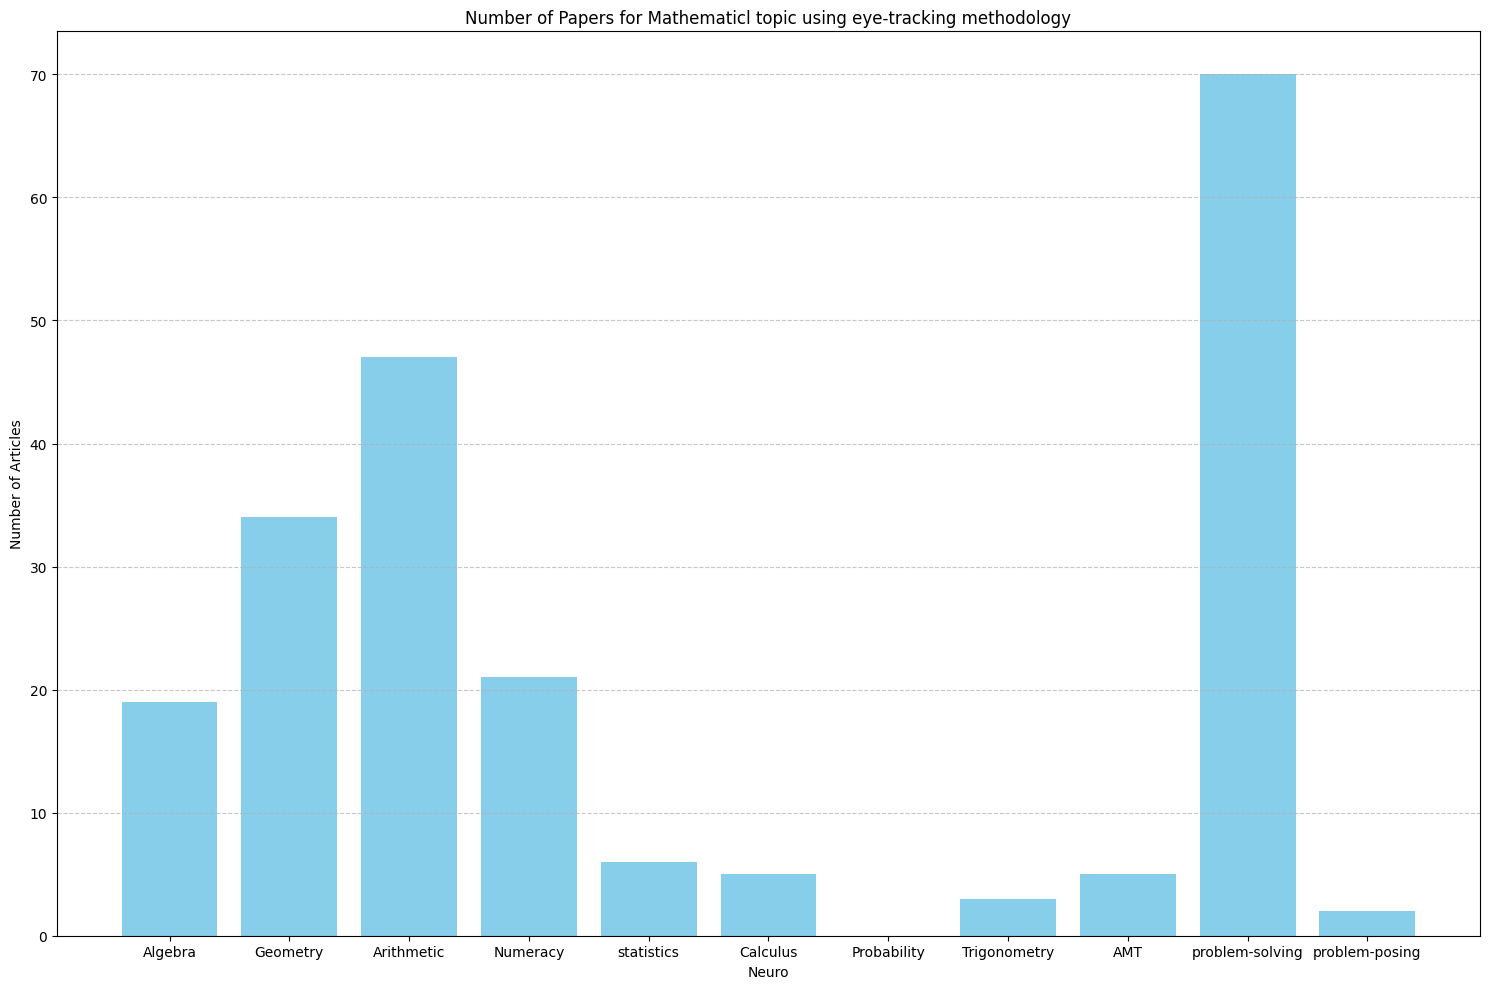

fNIRS {'Algebra': 0, 'Geometry': 3, 'Arithmetic': 18, 'Numeracy': 6, 'statistics': 0, 'Calculus': 0, 'Probability': 0, 'Trigonometry': 0, 'AMT': 0, 'problem-solving': 11, 'problem-posing': 0}


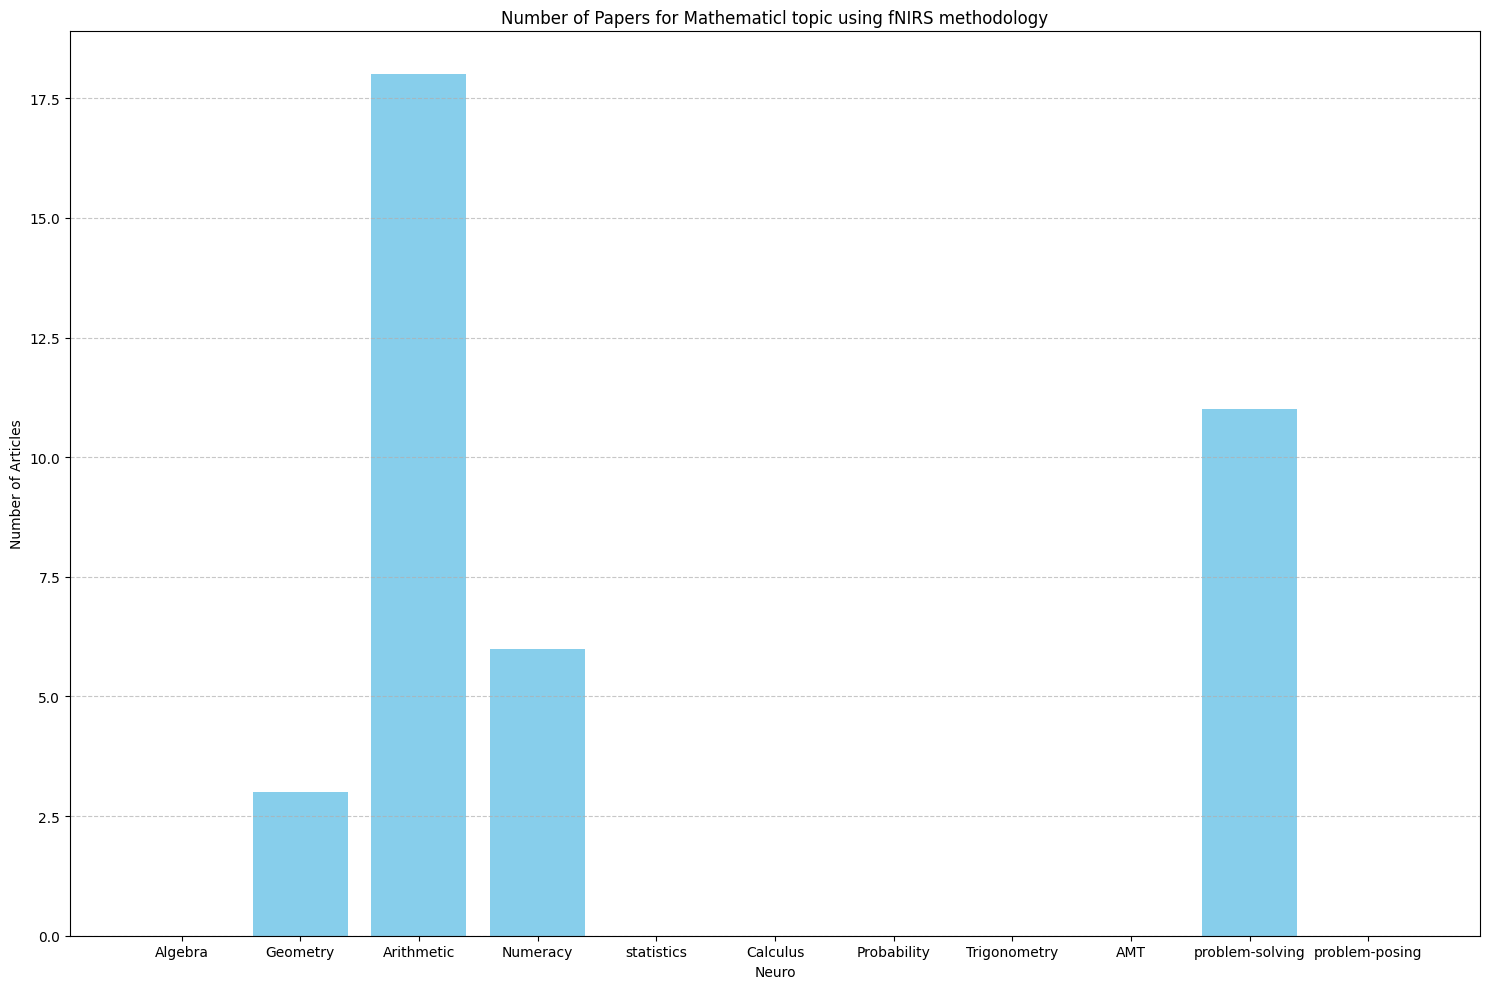

In [142]:
for search_term, forms in search_terms.items():
    relevant_rows = covidence[covidence['Author keywords'].str.lower().str.contains(forms)]
        
    math_terms_counts = {}
    for math_term in math_terms:
        lower_keywords = relevant_rows['Author keywords'].str.lower()
        contains_column = lower_keywords.str.contains(math_term.lower())  # column: True, True, False, False ...
        count_of_math_term = contains_column.sum()
        math_terms_counts[math_term] = count_of_math_term
    
    print(search_term, math_terms_counts)

    plt.figure(figsize=(15, 10))
    plt.bar(math_terms_counts.keys(), math_terms_counts.values(), color='skyblue')
    plt.title(f'Number of Papers for Mathematicl topic using {search_term} methodology')
    plt.xlabel('Neuro')
    plt.ylabel('Number of Articles')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 6. Authors with more than 5 Papers

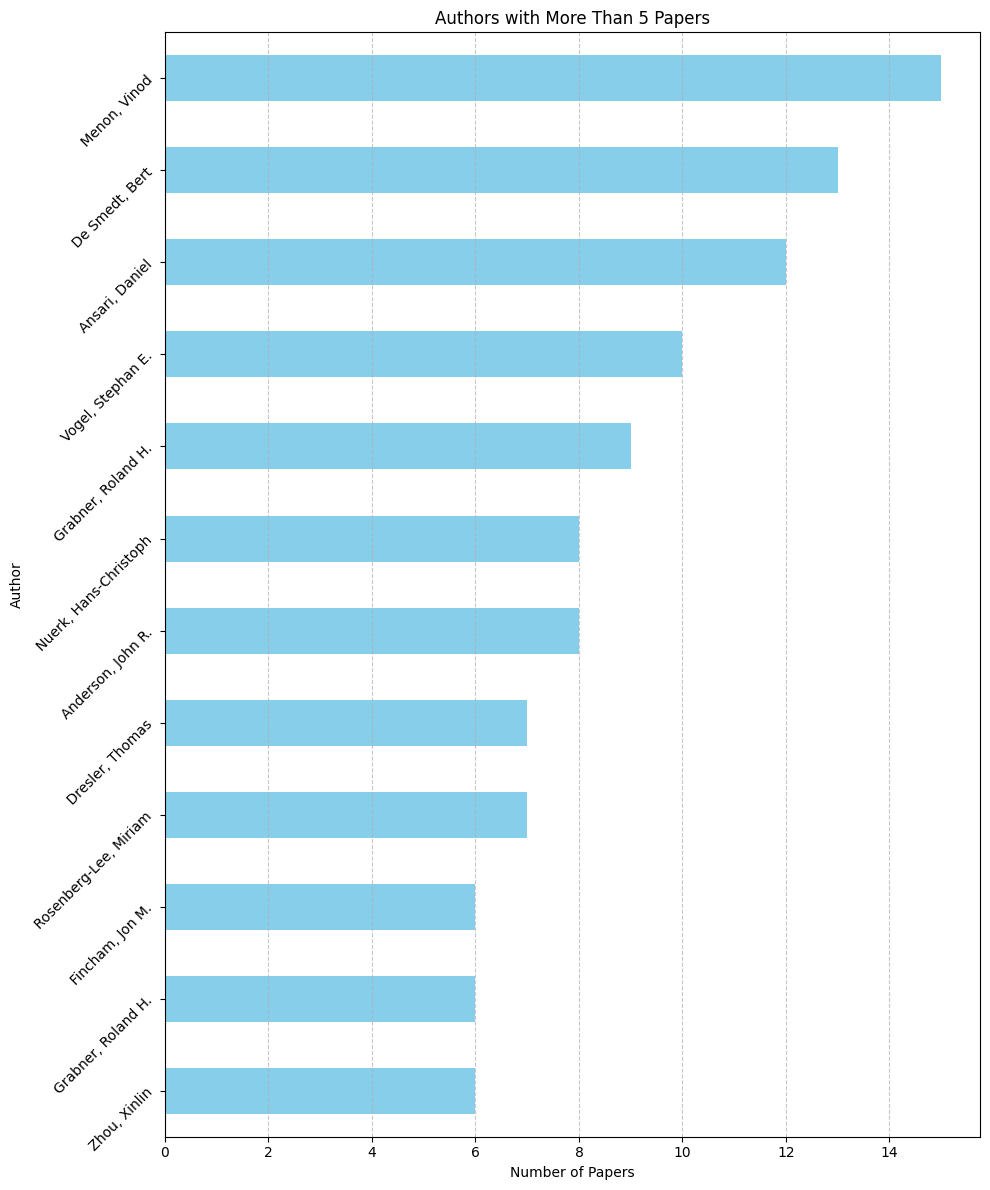

In [143]:
# Ensure the 'Authors' column is converted to strings
covidence['Authors'] = covidence['Authors'].astype(str).str.split(';')

# Count the occurrences of each author
author_counts = covidence['Authors'].explode().value_counts().sort_values(ascending=True)

# Filter authors with more than 5 articles
authors_more_than_5 = author_counts[author_counts > 5]

# Plot the data as a horizontal bar plot
authors_more_than_5.plot(kind='barh', color='skyblue', figsize=(10, 12))
plt.title('Authors with More Than 5 Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Author')
plt.xticks(np.arange(0, max(author_counts)+1, 2))
plt.yticks(rotation=45, ha='right')  # Rotate author names by 45 degrees for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 7. Journals with more than 3 Papers

Journal
neuroimage                           30
neuropsychologia                     28
zdm - mathematics education          17
frontiers in psychology              14
journal of cognitive neuroscience    14
frontiers in human neuroscience      13
developmental science                12
plos one                             11
scientific reports                   10
human brain mapping                  10
Name: count, dtype: int64


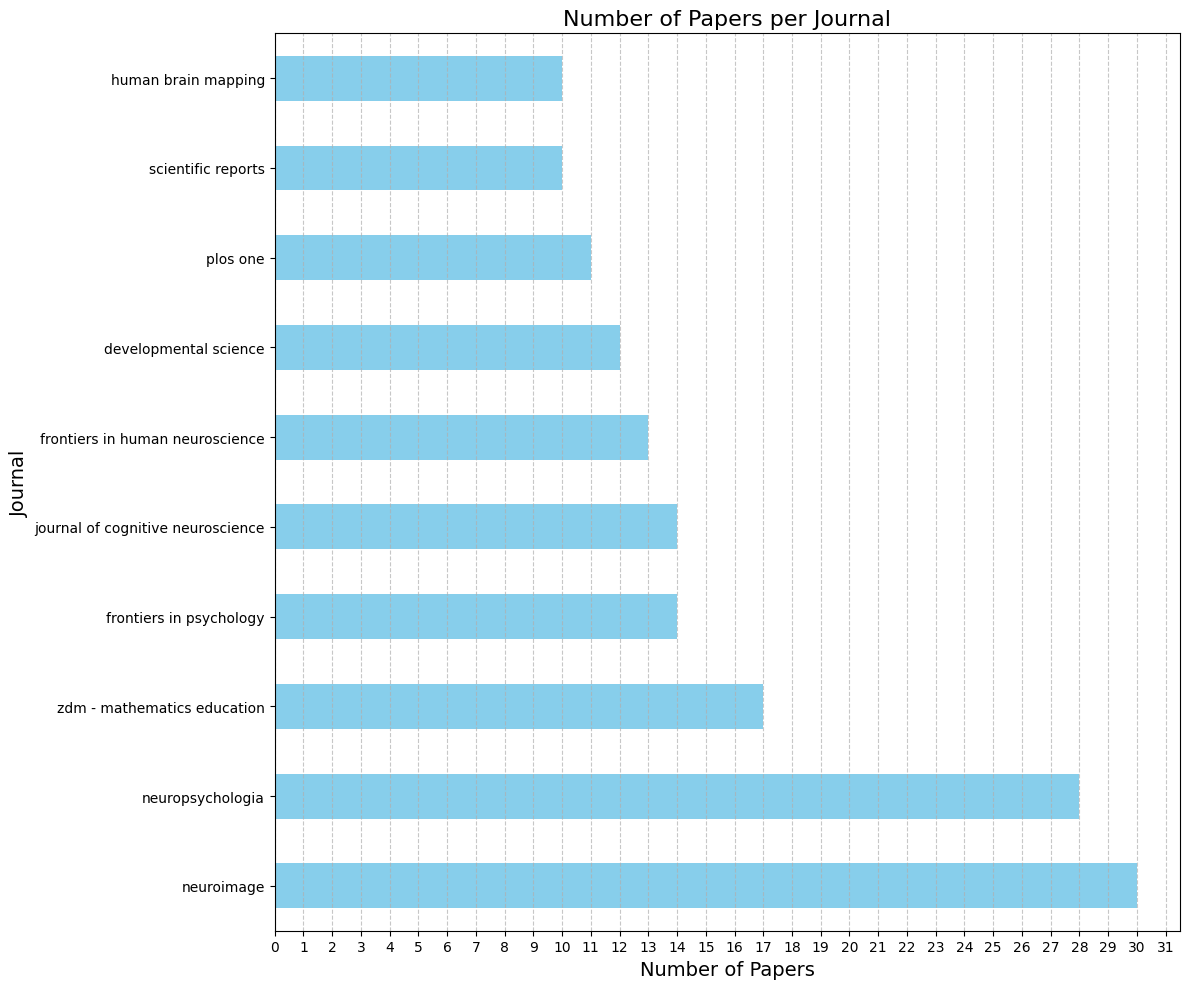

In [144]:
import matplotlib.pyplot as plt

# Count the number of articles published in each journal
articles_per_journal = covidence['Journal'].str.lower().value_counts()

# Filter out journals with more than 3 articles
filtered_articles_per_journal = articles_per_journal[articles_per_journal > 3]

# Select the top 10 journals
top_10_journals = filtered_articles_per_journal.head(10)

# Print the filtered counts for each journal
print(top_10_journals)

# Plot the data as a horizontal bar plot
plt.figure(figsize=(12, 10))  # Adjust the figure size
ax = top_10_journals.plot(kind='barh', color='skyblue')
plt.title('Number of Papers per Journal', fontsize=16)
plt.xlabel('Number of Papers', fontsize=14)
plt.ylabel('Journal', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Set x-axis to jump in increments of 1
ax.xaxis.set_major_locator(plt.MultipleLocator(1))

plt.show()


# 8. Distribution of publications from 1980 to 2024 for each psychology topics

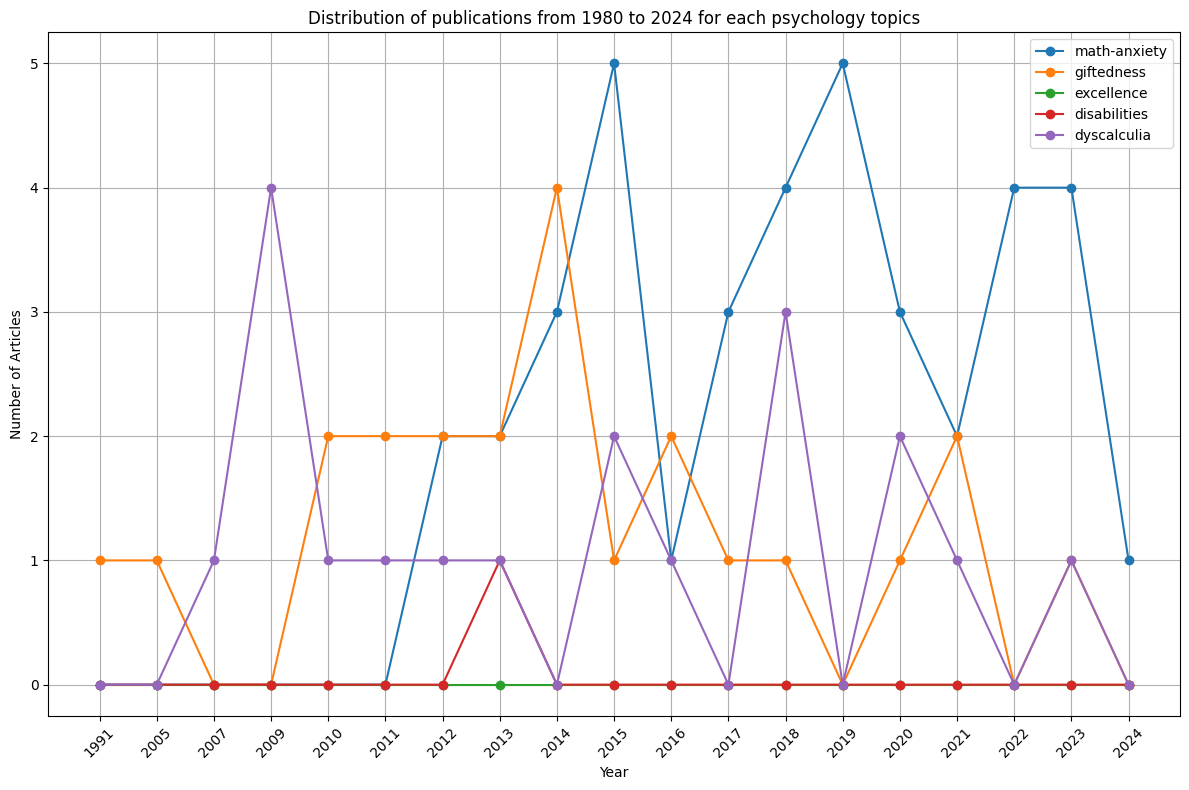


Number of Articles per Search Term and Year:
       math-anxiety  giftedness  excellence  disabilities  dyscalculia
1991             0           1           0             0            0
2005             0           1           0             0            0
2007             0           0           0             0            1
2009             0           0           0             0            4
2010             0           2           0             0            1
2011             0           2           0             0            1
2012             2           2           0             0            1
2013             2           2           0             1            1
2014             3           4           0             0            0
2015             5           1           0             0            2
2016             1           2           0             0            1
2017             3           1           0             0            0
2018             4           1           0 

In [145]:
# Define the terms to search for

# Convert 'Author keywords' column to lowercase and replace 'mri' with 'fmri' for uniformity
covidence['Author keywords'] = covidence['Author keywords'].str.lower()

# Initialize an empty dictionary to store counts for each term per year
term_counts_per_year = {term: covidence[covidence['Author keywords'].str.contains(term.lower())]['Published Year'].value_counts().sort_index() for term in psycho_terms}

# Ensure all years are included in the plots
years = sorted(set().union(*[counts.index for counts in term_counts_per_year.values()]))

# Plot the data
plt.figure(figsize=(12, 8))
for term, counts in term_counts_per_year.items():
    counts = counts.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
    plt.plot(counts.index, counts.values, marker='o', label=term)

plt.title('Distribution of publications from 1980 to 2024 for each psychology topics')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display number of articles per search term and year in a table
article_counts = pd.DataFrame(index=years)

for term in psycho_terms:
    term_counts_per_year = covidence[covidence['Author keywords'].str.contains(term.lower())]['Published Year'].value_counts().sort_index()
    term_counts_per_year = term_counts_per_year.reindex(years, fill_value=0)  # Ensure counts for all years, fill missing with 0
    article_counts[term] = term_counts_per_year

print("\nNumber of Articles per Search Term and Year:\n", article_counts)